In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [4]:
placement_df = pd.read_csv('Placement_Data_Full_Class.csv')
placement_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [5]:
placement_df.shape

(215, 15)

## Summarizing the data 

In [6]:
categorical_vars = placement_df.select_dtypes(include=['object','bool'])
categorical_vars.describe()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [7]:
placement_df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


---

# Exploratory Data Analysis

---

#### Checking proportion of the data are Male and Female

<AxesSubplot:ylabel='gender'>

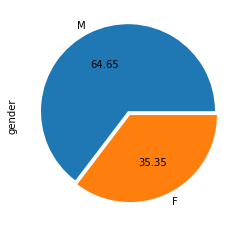

In [8]:
placement_df['gender'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=[0.05,0])

In the dataset, there is 64.65% of male and 35.35% of female.

<AxesSubplot:xlabel='gender', ylabel='count'>

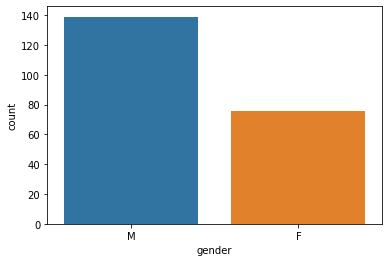

In [9]:
sns.countplot(data = placement_df, x = 'gender')

#### Gender proportion

 * Male = 65%
 * Female = 35%
 
In the dataset, there are almost two times as many records for male students as for female students.

#### Checking student distribution in 3 streams in 12th Grade (hsc_s)

<AxesSubplot:ylabel='hsc_s'>

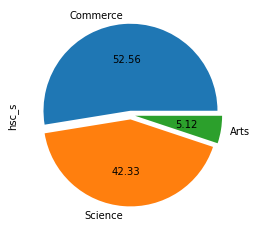

In [10]:
placement_df['hsc_s'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=[0.05, 0.05, 0.05])

#### Student distribution 3 streams in 12th Grade

 * Commerce = 52.56%
 * Science = 42.33% 
 * Arts = 5.12%

#### Checking student distribution in under graduate degree

<AxesSubplot:ylabel='degree_t'>

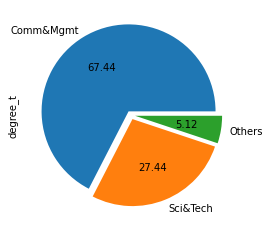

In [11]:
placement_df['degree_t'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=[0.05, 0.05, 0.05])

#### Student distribution Comm&Mgmt, Sci&Tech and others in under graduate degree

 * Commerce and Management = 67.44%
 * Science and Technology = 27.44% 
 * Others = 5.12%

#### Checking student distribution by gender in 3 streams in 12th Grade (hsc_s)

<AxesSubplot:xlabel='count', ylabel='hsc_s'>

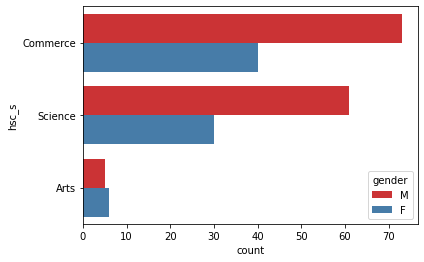

In [12]:
sns.countplot(y = 'hsc_s',hue = placement_df['gender'], palette = "Set1", data = placement_df)

#### Distribution by gender in 3 streams in 12th Grade

 * Male students in Commerce almost twice the Female students in Commerce
 * Male students in Science twice the Female students in Science
 * Female in Arts > Male in Arts however, the numbers are not drastically different


---

---

## Data Cleaning

---

In [13]:
placement_df = placement_df.drop(columns=['sl_no'])

#### Checking and handling null values

In [14]:
placement_df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Except for salary with 67 null entries, none of the columns have null values

#### Checking data with null values to figure out a way to fill them

In [15]:
null_rows = placement_df[placement_df.isnull().any(axis=1)]
null_rows

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


#### Filling null values of salary with 0 because the data with null values is all of the people whose status is not placed

In [16]:
placement_df['salary'].fillna(0, inplace=True)

print('null values in salary column:',placement_df['salary'].isnull().sum())

null values in salary column: 0


In [17]:
placement_df.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

---

#### Changing Workex column's value to True and False

Workex column stands for "work experience," and the values for the columns are "Yes" or "No." However, we can change the values of "Yes" to 1 and "No" to 0 instead.

In [18]:
placement_df['workex'].replace(['Yes','No'], [True,False], inplace=True)

In [19]:
placement_df[['workex']]

,workex
0,False
1,True
2,False
3,False
4,False
...,...
210,False
211,False
212,True
213,False


#### Changing Status column's value to True and False

The "Placed" or "Not Placed" values for the columns in the Status column indicate whether or not the individual has been placed according to the data. The values of "Placed" and "Not Placed" can, however, be changed to 1 and 0, respectively.

In [20]:
placement_df['status'].replace(['Placed', 'Not Placed'], [True,False], inplace=True)

#### Demonstration of removing outliers from salary column

In [21]:
Q1 = placement_df['salary'].quantile(0.25)
Q3 = placement_df['salary'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (placement_df['salary'] >= Q1 - 1.5 * IQR) & (placement_df['salary'] <= Q3 + 1.5 *IQR)
placement_df_filtered=placement_df.loc[filter]

In [22]:
placement_df_filtered

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,Mkt&HR,58.80,True,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,True,86.5,Mkt&Fin,66.28,True,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,False,75.0,Mkt&Fin,57.80,True,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,False,66.0,Mkt&HR,59.43,False,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,False,96.8,Mkt&Fin,55.50,True,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,False,91.0,Mkt&Fin,74.49,True,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,False,74.0,Mkt&Fin,53.62,True,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,True,59.0,Mkt&Fin,69.72,True,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,False,70.0,Mkt&HR,60.23,True,204000.0


Text(0.5, 1.0, 'After removing outliers(salary)')

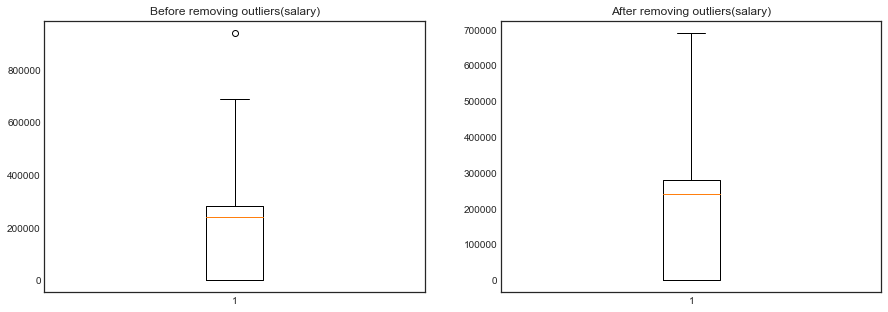

In [23]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(placement_df['salary'])
ax.set_title('Before removing outliers(salary)')
ax=plt.subplot(122)
plt.boxplot(placement_df_filtered['salary'])
ax.set_title('After removing outliers(salary)')

<AxesSubplot:>

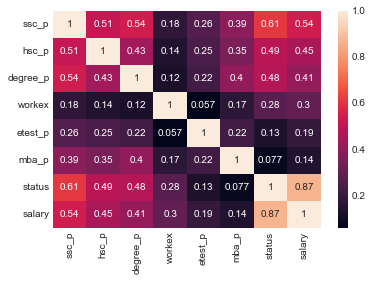

In [24]:
sns.heatmap(placement_df.corr(), annot=True)

#### Convert the degree_t column's value into different column and append value as 0 if the row does not has that degree and 1 if the row has that degree

In [25]:
# Split the values in the column at the '&' character
degree_split_df = placement_df['degree_t'].str.split('&', expand=True)

# Flatten the resulting DataFrame
degree_split_df = degree_split_df.stack().reset_index(level=1, drop=True)

# Use pd.get_dummies to convert the values into separate columns with binary values
degree_split_df = pd.get_dummies(degree_split_df)

degree_split_df

,Comm,Mgmt,Others,Sci,Tech
0,0,0,0,1,0
0,0,0,0,0,1
1,0,0,0,1,0
1,0,0,0,0,1
2,1,0,0,0,0
...,...,...,...,...,...
212,0,1,0,0,0
213,1,0,0,0,0
213,0,1,0,0,0
214,1,0,0,0,0


#### Convert the specialisation column's value into different column and append value as 0 if the row does not has that degree and 1 if the row has that degree

In [26]:
# Split the values in the column at the '&' character
specialisation_split_df = placement_df['specialisation'].str.split('&', expand=True)

# Flatten the resulting DataFrame
specialisation_split_df = specialisation_split_df.stack().reset_index(level=1, drop=True)

# Use pd.get_dummies to convert the values into separate columns with binary values
specialisation_split_df = pd.get_dummies(specialisation_split_df)

specialisation_split_df

,Fin,HR,Mkt
0,0,0,1
0,0,1,0
1,0,0,1
1,1,0,0
2,0,0,1
...,...,...,...
212,1,0,0
213,0,0,1
213,0,1,0
214,0,0,1


#### Joining the degree_split_df and specialisation_split_df to the placement_df

In [27]:
placement_df = placement_df.join([degree_split_df,specialisation_split_df])

In [28]:
placement_df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,...,status,salary,Comm,Mgmt,Others,Sci,Tech,Fin,HR,Mkt
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,0,0,0,1,0,0,0,1
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,0,0,0,1,0,0,1,0
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,0,0,0,0,1,0,0,1
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,0,0,0,0,1,0,1,0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,True,86.5,...,True,200000.0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,False,70.0,...,True,204000.0,0,1,0,0,0,0,1,0
214,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,False,89.0,...,False,0.0,1,0,0,0,0,0,0,1
214,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,False,89.0,...,False,0.0,1,0,0,0,0,0,1,0
214,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,False,89.0,...,False,0.0,0,1,0,0,0,0,0,1


---

#### Changing required column's data type to boolean

In [29]:
placement_df['workex'] = placement_df['workex'].astype(bool)
placement_df['status'] = placement_df['status'].astype(bool)

placement_df['Comm'] = placement_df['Comm'].astype(bool)
placement_df['Mgmt'] = placement_df['Mgmt'].astype(bool)
placement_df['Others'] = placement_df['Others'].astype(bool)
placement_df['Sci'] = placement_df['Sci'].astype(bool)
placement_df['Tech'] = placement_df['Tech'].astype(bool)
placement_df['Fin'] = placement_df['Fin'].astype(bool)
placement_df['HR'] = placement_df['HR'].astype(bool)
placement_df['Mkt'] = placement_df['Mkt'].astype(bool)


#### Checking data type

In [30]:
placement_df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex               bool
etest_p           float64
specialisation     object
mba_p             float64
status               bool
salary            float64
Comm                 bool
Mgmt                 bool
Others               bool
Sci                  bool
Tech                 bool
Fin                  bool
HR                   bool
Mkt                  bool
dtype: object

---

## Answering questions

---

#### Who is getting more salary on the basis of Gender?

In [31]:
def percentageCalc(number1, number2):

    percentage_difference = 100 * (abs(number1 - number2) / ((number1 + number2) / 2))
    
    return format(percentage_difference)

# Group data by gender
grouped = placement_df.groupby("gender")

# Calculate average salary for each gender group
average_salary = grouped["salary"].mean()

# Print average salary for each gender group
print(average_salary)
print(percentageCalc(218066,167863))




gender
F    167863.013699
M    218065.934066
Name: salary, dtype: float64
26.01670255409674


The average salary for Female is 167863.01 and the average salary for Male is 218065.93.

The percentage difference between the two groups is 26.02%, which means the average salary for Male is 26.02% higher than the average salary for group Female.

#### Which specialization has more job placement?

291
188
103


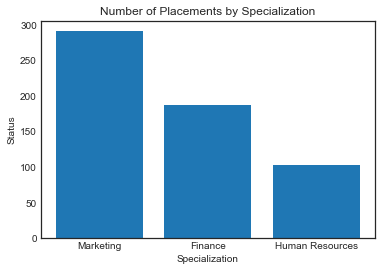

In [32]:
placement_df
marketing_placements = (placement_df['Mkt'].eq(True) & placement_df['status'].eq(True)).sum()
finance_placements = (placement_df['Fin'].eq(True) & placement_df['status'].eq(True)).sum()
hr_placements = (placement_df['HR'].eq(True) & placement_df['status'].eq(True)).sum()

print(marketing_placements)
print(finance_placements)
print(hr_placements)

# Plot the results
placements = [marketing_placements, finance_placements, hr_placements]
specializations = ['Marketing', 'Finance', 'Human Resources']
plt.bar(specializations, placements)
plt.xlabel("Specialization")
plt.ylabel("Status")
plt.title("Number of Placements by Specialization")
plt.show()

Theere are three different specializations: Marketing, Finance, and Human Resources. There are 291 placements in Marketing, 188 placements in Finance, and 103 placements in Human Resources. This means that out of the total number of students who specialized in Marketing, 291 students were successfully placed in a job. Similarly, out of the total number of students who specialize in Finance, 188 were successfully placed in a job, and out of the total number of students who specialize in Human Resources, 103 were successfully placed in a job. This information gives us an idea of which specialization is in higher demand and which is relatively less in demand in the job market.

#### Which specialization is getting more salary?

In [33]:
marketing_salary = placement_df[placement_df['Mkt'] == 1]['salary'].mean()
finance_salary = placement_df[placement_df['Fin'] == 1]['salary'].mean()
hr_salary = placement_df[placement_df['HR'] == 1]['salary'].mean()

# display the results
print("Average salary for marketing:", marketing_salary)
print("Average salary for finance:", finance_salary)
print("Average salary for human resources:", hr_salary)

Average salary for marketing: 200572.7923627685
Average salary for finance: 238059.3220338983
Average salary for human resources: 152229.50819672132


For each specialization, the average salary of the students who got placed successfully has been calculated. According to the data, the average salary for Marketing specialization is 200,572.79, for Finance specialization it is 238,059.32, and for Human Resources it is 152,229.51. This data can give an insight into the job market for each specialization and help students make informed decisions about their career paths.

#### Which hsc_s gets more salary on the basis of gender?

In [34]:
# Group data by hsc_s module
grouped = placement_df.groupby("hsc_s")

# Calculate average salary for each hsc_s module group
average_salary = grouped["salary"].mean()

# Print average salary for each hsc_s module group
print(average_salary)


hsc_s
Arts        135777.777778
Commerce    201831.111111
Science     205590.909091
Name: salary, dtype: float64


There are three different module in hsc_s: Arts, Commerce, and Science. The average salary of Arts is 135777.77, which is  approximately 46% lower than the average salary of Commerce which is 201831.11. The average salary of Science is 205590.90, which is higher than the average salary of Arts by approximately 51% but lower than the average salary of Commerce by approximately 1%.

#### Who has high job placement on the basis of degree_t and gender?

In [35]:
grouped = placement_df.groupby(["degree_t", "gender"])["status"].agg("sum")
result = grouped.reset_index().sort_values("status", ascending=False)
result

,degree_t,gender,status
1,Comm&Mgmt,M,276
0,Comm&Mgmt,F,132
5,Sci&Tech,M,120
4,Sci&Tech,F,44
2,Others,F,8
3,Others,M,2


The data represents the job placement status of students based on their degree_t (degree type) and gender. 
Male students with a degree in Commerce & Management  have the highest number of placements with a total of 276, followed by female students with a degree in Commerce & Management  with 132 placements.

In terms of students with a degree in Science & Technology, the number of male students placed is 120, which is significantly lower compared to the number of male students with a degree in Commerce & Management . The number of female students with a degree in Science & Technology who are placed is 44, which is lower than the number of female students with a degree in Commerce & Management .

The number of male students with a degree in Others who have been placed is 2, which is significantly lower compared to the number of male students with a degree in Commerce & Management  or Science & Technology. The number of female students with a degree in Others who have been placed is 8, which is also lower compared to the number of female students with a degree in Commerce & Management  or Science & Technology.

From the data, we can conclude that a degree in Commerce & Management  leads to a higher number of placements for both male and female students, followed by a degree in Science & Technology. A degree in Others seems to have a much lower number of placements for both male and female students.

#### Which gender has high work experience?

In [36]:
# Calculating the sum of work experience for each gender
gender_work_experience = placement_df.groupby("gender")["workex"].sum()
result = gender_work_experience.reset_index().sort_values("gender", ascending=False)
result


,gender,workex
1,M,204
0,F,84


There are 204 male students with work experience and 84 female students with work experience. This information can be used to understand the distribution of work experience among students based on their gender, and to make informed decisions or observations based on it.

#### Which specialization is getting more salary in the basis of degree_t?

In [37]:
results = []

for degree in ['Comm&Mgmt', 'Sci&Tech', 'Others']:
    MktBasedOnDegree = placement_df[(placement_df['Mkt'] == True) & (placement_df['degree_t'] == degree)]['salary'].mean()
    FinBasedOnDegree = placement_df[(placement_df['Fin'] == True) & (placement_df['degree_t'] == degree)]['salary'].mean()
    HRBasedOnDegree = placement_df[(placement_df['HR'] == True) & (placement_df['degree_t'] == degree)]['salary'].mean()                             

    results.append({
        'degree': degree,
        'Mkt': MktBasedOnDegree,
        'Fin': FinBasedOnDegree,
        'HR': HRBasedOnDegree
    })
    
df = pd.DataFrame(results)
df

,degree,Mkt,Fin,HR
0,Comm&Mgmt,196000.000000,229337.209302,147406.779661
1,Sci&Tech,218627.118644,268933.333333,166586.206897
2,Others,127454.545455,150000.000000,114571.428571


#### Which degree_t is placed more?

In [38]:
degree_job_placement = placement_df.groupby("degree_t")["status"].sum()

result = degree_job_placement.reset_index().sort_values("status", ascending=False)

result


,degree_t,status
0,Comm&Mgmt,408
2,Sci&Tech,164
1,Others,10


There are 3 different degree_t types in the data: "Comm&Mgmt", "Sci&Tech", and "Others". Among the three degree_t types, "Comm&Mgmt" has the highest number of job placements with 408. "Sci&Tech" has the second highest with 164 placements. "Others" has the lowest number of placements with only 10.

#### Which degree_t is getting low salary?

In [39]:
# removing the outliers in salary 
Q1 = placement_df['salary'].quantile(0.25)
Q3 = placement_df['salary'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (placement_df['salary'] >= Q1 - 1.5 * IQR) & (placement_df['salary'] <= Q3 + 1.5 *IQR)
placement_df_filtered=placement_df.loc[filter]


#Finding the degree_t with salary below average salary
average_salary = placement_df_filtered['salary'].mean()
low_salary_degree = placement_df['degree_t'][placement_df['salary'] < average_salary].value_counts()
result = low_salary_degree.reset_index()
result

,index,degree_t
0,Comm&Mgmt,172
1,Sci&Tech,72
2,Others,12


The table above represents the number of records in the dataset that correspond to individuals who have taken a particular degree program Comm&Mgmt, Sci&Tech, or Others and whose salaries are below the average salary.

The highest number of records (172) correspond to individuals who have taken the degree program in Comm&Mgmt, followed by Sci&Tech (72) and Others (12). These results can be used to make inferences about the relative competitiveness of the job market for individuals who have taken these degrees and to make comparisons with other degree programs. Hence, Commerce and Management degree have the lower salary than other degrees.

#### Which degree_t is has low job placement?

In [44]:
placement_df['status'] = placement_df['salary'] < placement_df['salary'].mean()

degree_counts = placement_df.groupby(['degree_t', 'status']).size().reset_index(name='count')
degree_counts = degree_counts[degree_counts['status'] == True]

degree_counts.sort_values(by='count', ascending=True)

,degree_t,status,count
3,Others,True,12
5,Sci&Tech,True,76
1,Comm&Mgmt,True,192


There are 12 people who have received job placements with a degree in "Others", 76 people with "Sci&Tech" degree, and 192 people with "Comm&Mgmt" degree. Hence, people with Science and Technology degree have lower job placement than Commerce and Management degree but have higher placement than other degree.
This data can be useful to understand the job placement trend for different degree types and make informed decisions.